In [1]:
import numpy as np
import csv

In [2]:
# 产生单个随机时序信号，包含一个200点抽样的低内奎斯特采样信号和1000点抽样的内奎斯特采样信号
def signal(n, a, f, sample_training, sample_testing):

    # n是单信号谐波的叠加次数；a是单信号的振幅范围；f是单信号的频率信息
    # N ∈ [5 (1) 30]; A ∈ [0 (0.1) 1]; F ∈ [100 (1) 200]
    # sample_training = 200; sample_testing = 1000
    train_signal = 0
    test_signal = 0
    a_list = np.arange(a[0], a[1] + a[2], a[2])
    f_list = np.arange(f[0], f[1] + f[2], f[2])

    for index_N in range(n[0], n[1] + n[2], n[2]):

        # get train_signal(wave-form)，叠加产生低内奎斯特采样信号（200点）
        train_signal += np.random.randint(low=0, high=len(a_list), size=1) * np.sin(
            2 * np.pi * np.random.randint(low=0, high=len(f_list), size=1) * np.linspace(0, 1, 200)
        )

        # get test_signal(as same as train_signal)，叠加产生内奎斯特采样信号（1000点）
        # the difference is that test_signal has more sample point than test_signal
        # we call test_signal -- under-nyquist sample
        test_signal += np.random.randint(low=0, high=len(a_list), size=1) * np.sin(
            2 * np.pi * np.random.randint(low=0, high=len(f_list), size=1) * np.linspace(0, 1, 1000)
        )

    print('train_signal-'+str(type(train_signal)), len(train_signal))
    print('test signal-'+str(type(test_signal)), len(test_signal))
    # return a tuple including train_signal and test_signal
    return train_signal, test_signal

In [3]:
def dataset_generate(n, a, f, sample_training, sample_testing, num_iteration=8):

    # use list generation to instead 'for' loop for faster operation
    train_signal = [signal(n, a, f, sample_training, sample_testing)[0]
            for _ in range(num_iteration)]
    test_signal = [signal(n, a, f, sample_training, sample_testing)[1]
            for _ in range(num_iteration)]
    return train_signal, test_signal

In [4]:
# define hyperparameters
n = [5, 30, 1]
a = [0, 1, 0.1]
f = [100, 200, 1]
sample_training = 200
sample_testing = 1000

In [5]:
# generate traing and testing datasets
datasets = dataset_generate(n, a, f, sample_training, sample_testing)

train_signal-<class 'numpy.ndarray'> 200
test signal-<class 'numpy.ndarray'> 1000
train_signal-<class 'numpy.ndarray'> 200
test signal-<class 'numpy.ndarray'> 1000
train_signal-<class 'numpy.ndarray'> 200
test signal-<class 'numpy.ndarray'> 1000
train_signal-<class 'numpy.ndarray'> 200
test signal-<class 'numpy.ndarray'> 1000
train_signal-<class 'numpy.ndarray'> 200
test signal-<class 'numpy.ndarray'> 1000
train_signal-<class 'numpy.ndarray'> 200
test signal-<class 'numpy.ndarray'> 1000
train_signal-<class 'numpy.ndarray'> 200
test signal-<class 'numpy.ndarray'> 1000
train_signal-<class 'numpy.ndarray'> 200
test signal-<class 'numpy.ndarray'> 1000
train_signal-<class 'numpy.ndarray'> 200
test signal-<class 'numpy.ndarray'> 1000
train_signal-<class 'numpy.ndarray'> 200
test signal-<class 'numpy.ndarray'> 1000
train_signal-<class 'numpy.ndarray'> 200
test signal-<class 'numpy.ndarray'> 1000
train_signal-<class 'numpy.ndarray'> 200
test signal-<class 'numpy.ndarray'> 1000
train_signal-<cl

In [6]:
with open('./another_training_data.csv', 'a', newline='') as csvfile1:
    writer1 = csv.writer(csvfile1)
    # writer.writerow(['train_data'])
    writer1.writerows(datasets[0])
    
with open('./another_testing_data.csv', 'a', newline='') as csvfile2:
    writer2 = csv.writer(csvfile2)
    # writer.writerow(['train_data'])
    writer2.writerows(datasets[1])

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
unsampled_dataset = [list() for _ in range(8)]
target_dataset = [list() for _ in range(8)]

In [8]:
with open('./another_training_data.csv', 'r') as csvfile1:
    reader1 = csv.reader(csvfile1)
    for i, line1 in enumerate(reader1):
        for data in line1:
            unsampled_dataset[i].append(np.float(data))
    print(type(np.array(unsampled_dataset)[0]))

with open('./another_testing_data.csv', 'r') as csvfile2:
    reader2 = csv.reader(csvfile2)
    for i, line2 in enumerate(reader2):
        for data in line2:
            target_dataset[i].append(np.float(data))
    print(type(np.array(target_dataset)[0]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [9]:
x1 = np.arange(0, 1, 1/200)
x2 = np.arange(0, 1, 1/1000)
print(unsampled_dataset[0])
print(target_dataset[0])

[0.0, 92.44789649641042, -37.964602739639574, 45.428678223816206, -27.764093608597825, 19.760044240112038, -8.138807980573835, -25.71094192307685, 38.32396440411374, -21.3772970861936, 45.004096411402166, 25.31720346043567, -10.247201144306636, 4.2844752578902305, 13.122478940673158, 7.095260751952877, 30.491608279477138, -1.25455992349052, 5.3948154407452344, 21.088222550858838, -9.312051769751616, 39.666737745366895, 24.03912979215453, 11.329662260731507, 3.9946213043356718, 0.5245387401003074, 26.743525478667213, -45.97611153944122, 10.054130884999694, 53.66188511928719, 7.791977805355589, 27.567775587402096, 6.4344189606714295, -18.25590637706891, -7.414492809353403, -15.02951363490368, 31.17741946521591, -22.11540079191434, 39.2705950340736, 7.1947063962144835, -27.659617336855142, 23.661358083171088, -37.12427462128843, 0.280295222230881, -12.034915027363741, 15.077500461394884, 14.36728290374926, -44.137741254569825, 18.248028983678477, -27.610034976372074, 31.220552012151597, -

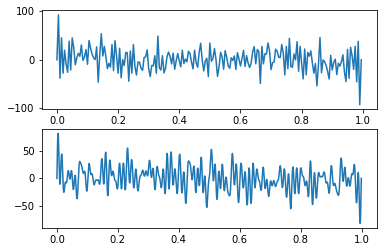

In [10]:
plt.subplot(211)
plt.plot(x1, unsampled_dataset[0])
plt.subplot(212)
plt.plot(x2, target_dataset[0])